# Homework 4
## Matthew Eller
## Time (hours): 8

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
pd.read_csv("C:/Users/Owner/Documents/chipotle.csv")

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), [Black Beans,...",$16.98
5,3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, [Fajita Vegetables,...",$11.75
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, [Pinto Beans, Che...",$9.25
9,5,1,Steak Burrito,"Fresh Tomato Salsa, [Rice, Black Beans, Pinto ...",$9.25


In [3]:
chipotle=pd.read_csv("C:/Users/Owner/Documents/chipotle.csv")

1. Read the data into Python and clean the item_price column by converting it to float numbers.

In [61]:
chipotle['item_price'] = chipotle['item_price'].replace('[\$,]', '', regex=True).astype(float)
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), [Black Beans,...",16.98


In [63]:
type(chipotle['item_price'][0])

numpy.float64

2. How many different items in the item_name column? What are they?

In [5]:
chipotle['item_name'].nunique()

50

In [6]:
chipotle['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

3. Each order has multiple items and different quantities. For all the orders, what are the average quantity and average total price?

In [45]:
average_quantity=chipotle.groupby(['order_id'])['quantity'].agg(lambda x: x.unique().sum()).reset_index()
average_item_price=chipotle.groupby(['order_id'])['item_price'].agg(lambda x: x.unique().sum()).reset_index()

In [48]:
print("Average Number of Items per Order")
average_quantity['quantity'].mean()

Average Number of Items per Order


1.2666303162486368

In [49]:
print("Average Price of Order")
average_item_price['item_price'].mean()

Total Price of Order


16.165256270447276

4. Which item was ordered with the largest total quantity? Which item was ordered with the highest total price?

In [58]:
chipotle.groupby(['item_name'])['quantity'].agg(lambda x: x.unique().sum()).reset_index().sort_values(by=['quantity'],ascending=False).head()

#Bottled Water was the most-ordered item at 32, followed by chips and fresh tomato salsa

,item_name,quantity
6,Bottled Water,32
24,Chips and Fresh Tomato Salsa,22
37,Side of Chips,12
25,Chips and Guacamole,10
18,Chicken Burrito,10


In [57]:
chipotle.groupby(['item_name'])['item_price'].agg(lambda x: x.unique().sum()/x.nunique()).reset_index().sort_values(by=['item_price'],ascending=False).head()

##Steak burrito is the most expensive single item

,item_name,item_price
39,Steak Burrito,16.174167
18,Chicken Burrito,16.025833
11,Carnitas Bowl,15.900000
17,Chicken Bowl,15.759231
42,Steak Salad Bowl,15.020000


5. Find the top three most popular choices that were added to an item.

In [146]:
chipotle['choice_description'].unique()

array([nan, 'Clementine', 'Apple', ...,
       'Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]',
       'Tomatillo Green Chili Salsa, [Rice, Black Beans]',
       'Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]'],
      dtype=object)

In [133]:
from collections import Counter
split=str(chipotle['choice_description']).split()
Counter(split).most_common(10)
#from here, the most common words are Salsa, Chili, and Tomato

[('Salsa,', 24),
 ('Chili', 21),
 ('NaN', 15),
 ('Tomato', 14),
 ('Fresh', 13),
 ('[Rice,', 13),
 ('Salsa', 11),
 ('Tomatillo', 10),
 ('[Fajita', 9),
 ('...', 8)]

In [142]:
chipotle['choice_description'].str.contains("Salsa").value_counts()

True     2808
False     568
Name: choice_description, dtype: int64

In [135]:
chipotle['choice_description'].str.contains("Chili").value_counts()

False    1827
True     1549
Name: choice_description, dtype: int64

In [147]:
chipotle['choice_description'].str.contains("Tomato").value_counts()

False    1948
True     1428
Name: choice_description, dtype: int64

6. Group the items into three types: Burrito and Bowl, Tacos and Salad, Sides and Drinks.

In [51]:
burrito_and_bowl=chipotle[chipotle['item_name'].str.contains("Burrito|Bowl")]
tacos_and_salad=chipotle[chipotle['item_name'].str.contains("Taco|Salad")]
sides_and_drinks=chipotle[chipotle['item_name'].str.contains("Side|Drink")]

In [54]:
burrito_and_bowl.head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), [Black Beans,...",16.98
5,3,1,Chicken Bowl,"Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour...",10.98
7,4,1,Steak Burrito,"Tomatillo Red Chili Salsa, [Fajita Vegetables,...",11.75
9,5,1,Steak Burrito,"Fresh Tomato Salsa, [Rice, Black Beans, Pinto ...",9.25
13,7,1,Chicken Bowl,"Fresh Tomato Salsa, [Fajita Vegetables, Rice, ...",11.25


In [55]:
tacos_and_salad.head()

,order_id,quantity,item_name,choice_description,item_price
8,4,1,Steak Soft Tacos,"Tomatillo Green Chili Salsa, [Pinto Beans, Che...",9.25
11,6,1,Chicken Crispy Tacos,"Roasted Chili Corn Salsa, [Fajita Vegetables, ...",8.75
12,6,1,Chicken Soft Tacos,"Roasted Chili Corn Salsa, [Rice, Black Beans, ...",8.75
35,18,1,Chicken Soft Tacos,"Roasted Chili Corn Salsa, Rice",8.75
36,18,1,Chicken Soft Tacos,"Roasted Chili Corn Salsa, [Cheese, Lettuce]",8.75


In [56]:
sides_and_drinks.head()

,order_id,quantity,item_name,choice_description,item_price
6,3,1,Side of Chips,NaN,1.69
32,16,1,Side of Chips,NaN,1.69
70,31,1,Side of Chips,NaN,1.69
149,67,1,Side of Chips,NaN,1.69
263,114,1,Canned Soft Drink,Coke,1.25


7. What proportion of all the orders include the tacos and salad type? What proportion of all the orders include the sides and drinks type?

In [160]:
len(tacos_and_salad.index)/len(chipotle.index)
# 11.68% of orders are of the tacos and salad type

0.11683254002596279

In [161]:
len(sides_and_drinks.index)/len(chipotle.index)
# 9.87% of orders are of the sides and drinks type

0.09865858935525747

```
Q2. Fill in the pattern in the following function to identify if a string is a valid phone number in US. A valid phone number in US can be of any of the following formats, where x signifies a digit.

+1 (xxx) xxx-xxxx
+1 (xxx)xxx-xxxx
+1 xxx xxx xxxx
+1 xxx-xxx-xxxx
+1 xxx.xxx.xxxx
+1 xxxxxxxxxx
(xxx) xxx-xxxx
(xxx)xxx-xxxx
xxx xxx xxxx
xxx-xxx-xxxx
xxx.xxx.xxxx
xxxxxxxxxx

import re
def isPhoneNumber(astring):
    if re.match("______________________",astring):
        return("Valid phone number")
    else:
        return("Invalid phone number")
```


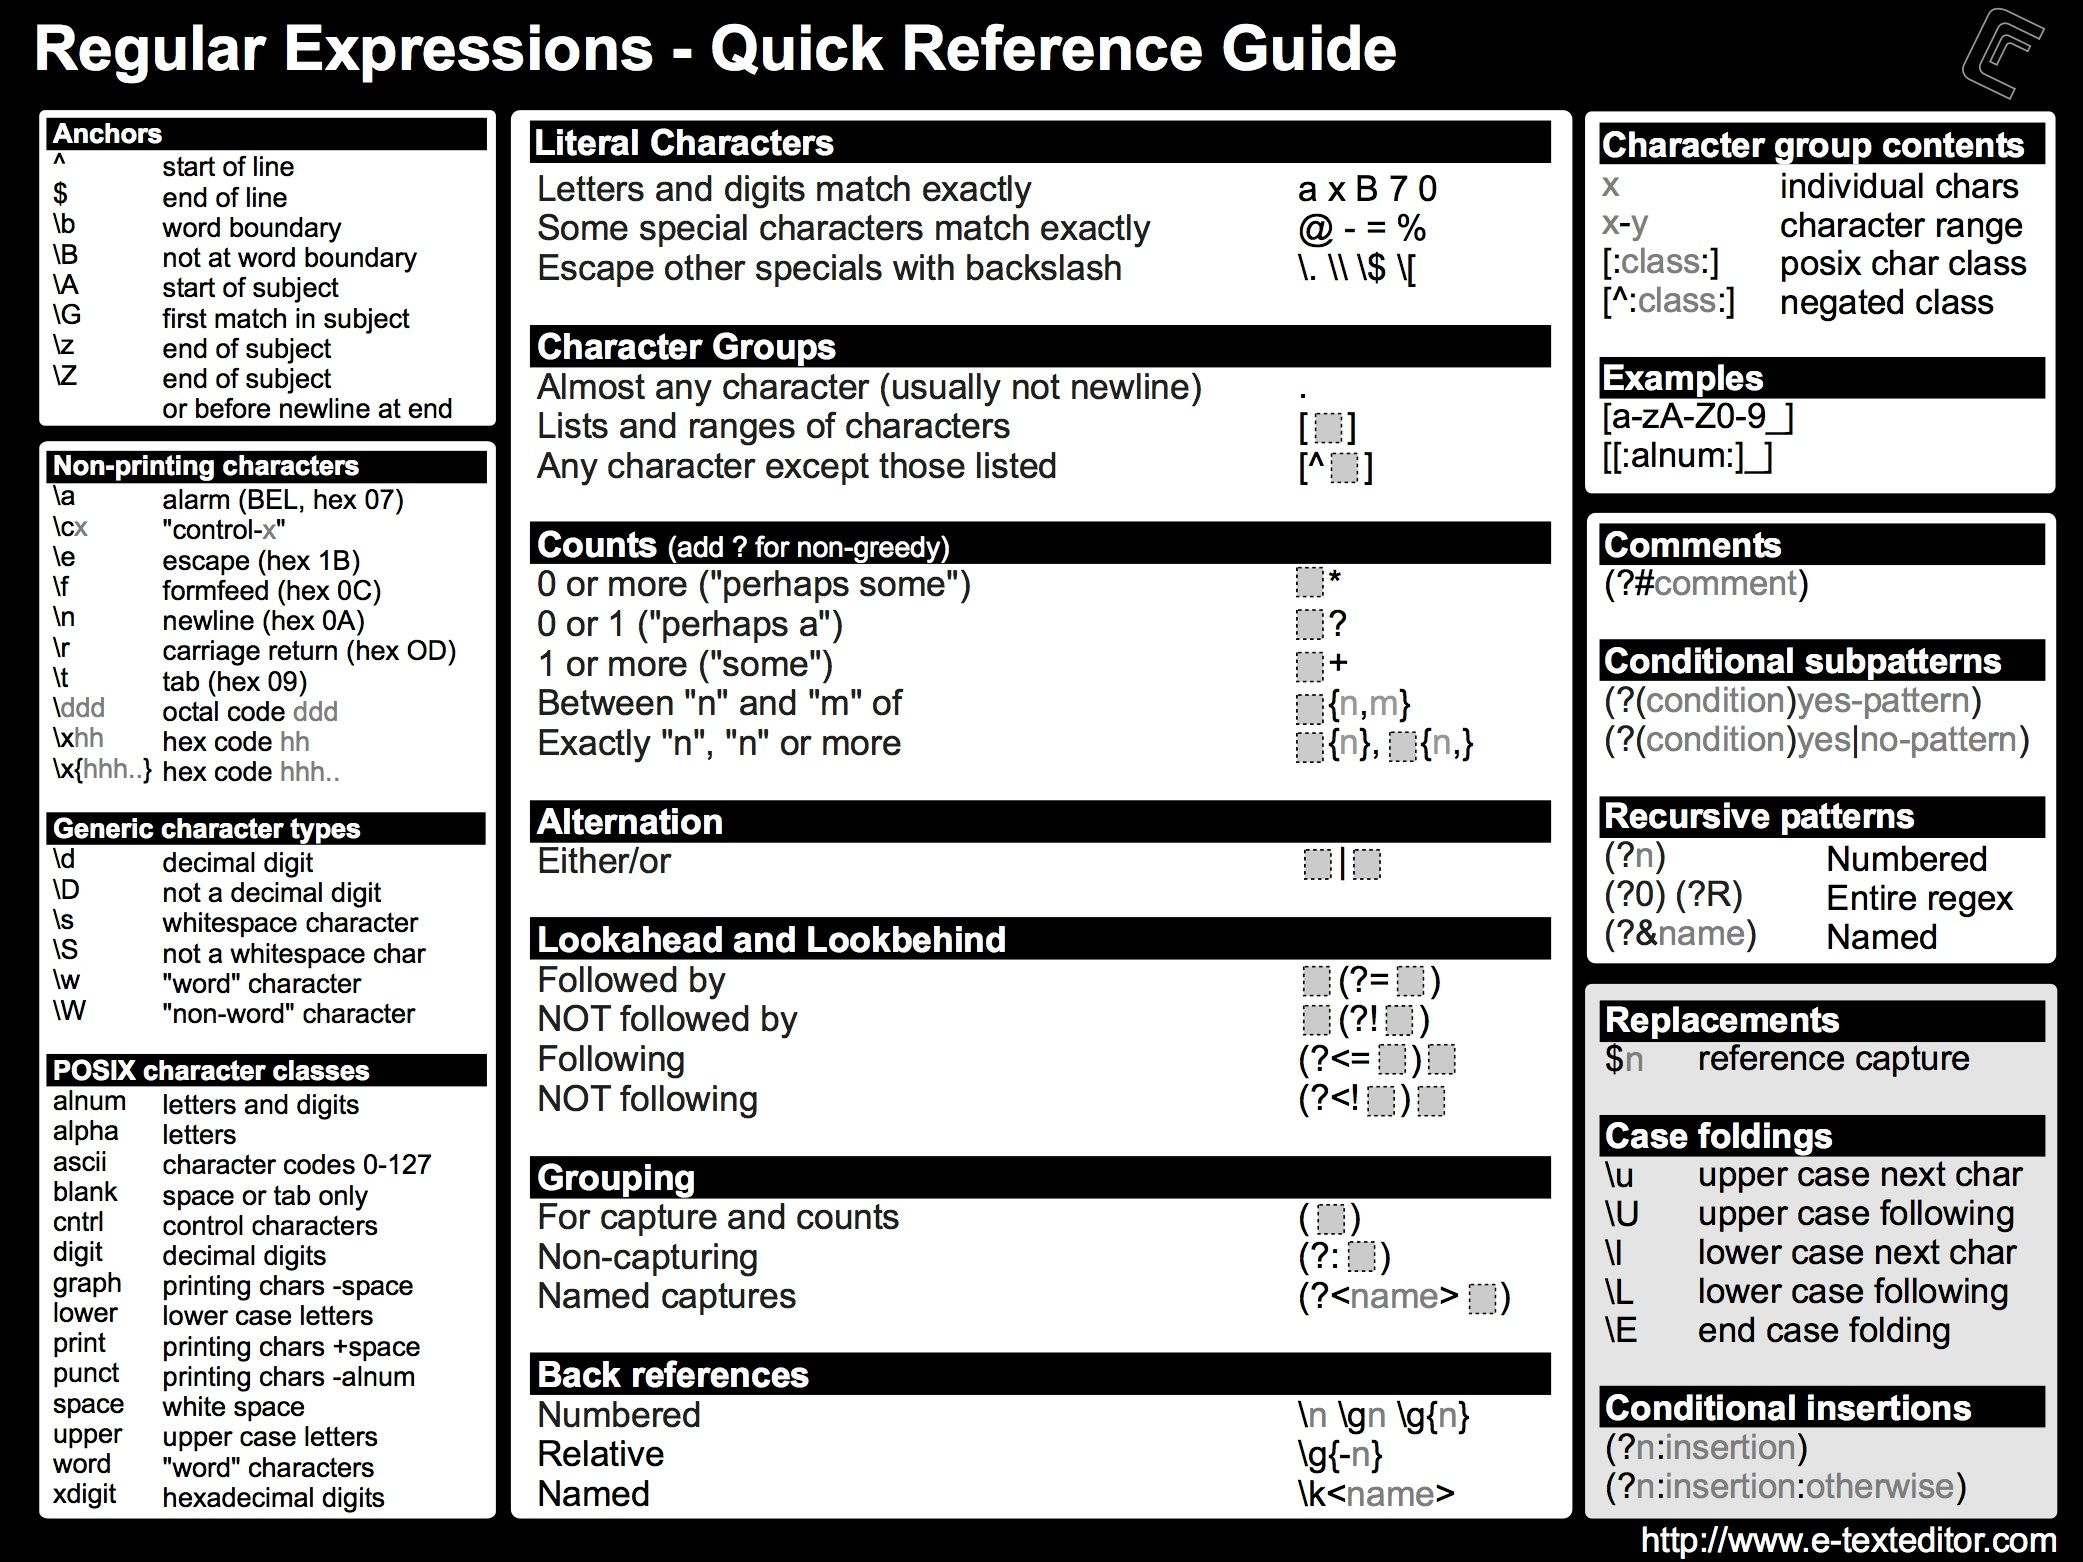

In [162]:
import re
def isPhoneNumber(astring):
    if re.match("^\s*(?:\+?(\d{1,3}))?[-. (]*(\d{3})[-. )]*(\d{3})[-. ]*(\d{4})(?: *x(\d+))?\s*$",astring):
        return("Valid phone number")
    else:
        return("Invalid phone number")

In [164]:
isPhoneNumber('+1 (402) 554-2800')

'Valid phone number'

In [165]:
isPhoneNumber('+1 (402)554-2800')

'Valid phone number'

In [167]:
isPhoneNumber('+1 402 554 2800')

'Valid phone number'

In [168]:
isPhoneNumber('+1 402-554-2800')

'Valid phone number'

In [169]:
isPhoneNumber('+1 402.554.2800')

'Valid phone number'